In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import sys; 
sys.path.insert(0, 'C:/Users/andre/Documents/GitHub/rotational_diffusion_photophysics')
sys.path.insert(0, 'C:/Users/andre/Documents/GitHub/rotational_diffusion_photophysics/plot')
import rotational_diffusion_photophysics as rdp
from plot_pulse_scheme import plot_pulse_scheme
from plot_sphere_series import plot_sphere_series
from rotational_diffusion_photophysics_models import starss1, starss2, starss3, starss3_detector_signals, isotropic_diffusion

In [41]:
# Rotational diffusion time of target systems
taus =  np.array([1e-6, 3e-6, 10e-6, 30e-6, 100e-6, 300e-6, 1e-3, 3e-3]) 

# STARSS1 signal
# t = np.linspace(-250e-6,1e-3,4000) # Time in a linearly spaced axis
t = np.logspace(-6,0,256) # Time in a log spaced axis
ss = [] # Signals
rs = [] # Anisotropys

for tau in taus:
    diffusion = isotropic_diffusion(tau)
    starss1.diffusion = diffusion
    s = starss1.detector_signals(t)
    r = rdp.anisotropy(s-s[:,-1][:,None])
    ss.append(s)
    rs.append(r)


C:/Users/andre/Documents/GitHub/rotational_diffusion_photophysics\rotational_diffusion_photophysics.py:209: RuntimeWarning: invalid value encountered in true_divide
  return (signals[0] - signals[1]) / (signals[0] + 2*signals[1])


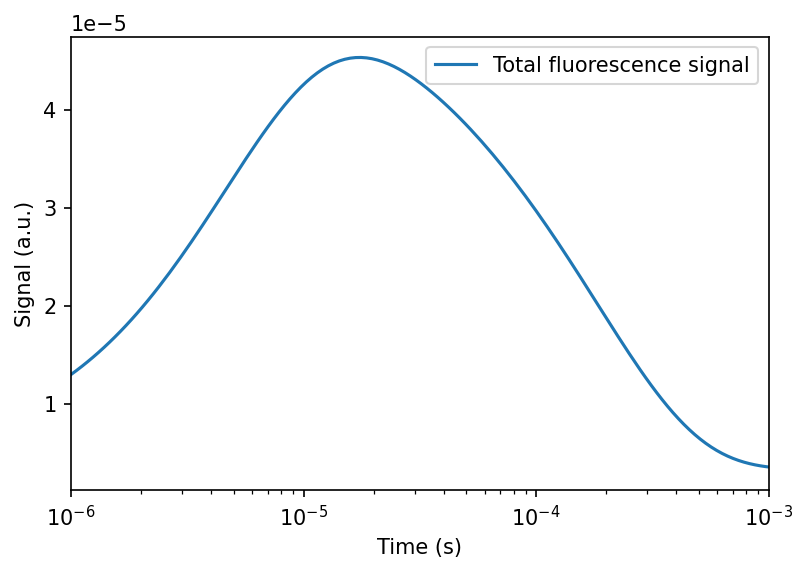

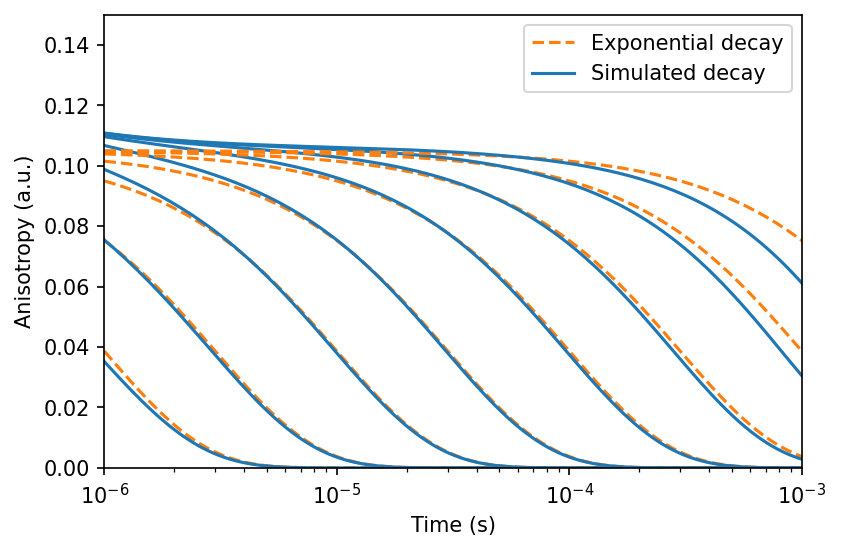

In [77]:
fig1, ax1 = plt.subplots()
fig1.set_dpi(150)
ax1.plot(t,np.sum(ss[1].T, axis=1), color='tab:blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Signal (a.u.)')
ax1.set_xlim([1e-6, 1e-3])
ax1.set_xscale('log')
ax1.legend(['Total fluorescence signal'])

fig2, ax2 = plt.subplots()
fig2.set_dpi(150)
for (s, r, tau) in zip(ss,rs,taus):
    ax2.plot(t, 0.105*np.exp(-t/tau), color='tab:orange', linestyle='--')
    ax2.plot(t,r, color='tab:blue')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Anisotropy (a.u.)')
ax2.set_xscale('log')
ax2.set_ylim([0, 0.150])
ax2.set_xlim([1e-6, 1e-3])
ax2.legend(['Exponential decay', 'Simulated decay'])
plt.savefig('starss1_anisotropy_exponential_decays')
    